In [1]:
import numpy as np

import geomstats.backend as gs
from geomstats.information_geometry.normal import UnivariateNormalDistributions

from matplotlib import pyplot as plt

In [2]:
space = UnivariateNormalDistributions()

In [3]:
bounds = ((-6.0, 6.0), (0.4, 4.0))

num = 100
params = [
    np.linspace(lower_bound, higher_bound, num=num)
    for lower_bound, higher_bound in bounds
]

params_grid = np.stack(np.meshgrid(*params), axis=-1)

In [4]:
fisher = space.metric.metric_matrix(params_grid)

fisher.shape

(100, 100, 2, 2)

In [5]:
sigma_min, _ = bounds[1]
t = np.linspace(0.0, 1.0, num=100)

point_a = np.array(
    [
        [-6, sigma_min],
        [-4, sigma_min],
        [-3, sigma_min],
        [0, sigma_min],
        [0, sigma_min],
        [2, sigma_min],
        [-5, sigma_min],
        [-2, sigma_min],
    ],
)


point_b = np.array(
    [
        [0, sigma_min],
        [4, sigma_min],
        [3, sigma_min],
        [6, sigma_min],
        [-2, sigma_min],
        [0, sigma_min],
        [5, sigma_min],
        [2, sigma_min],
    ]
)

geod = space.metric.geodesic(point_a, point_b)(t)

geod.shape

(8, 100, 2)

<>:14: SyntaxWarning: invalid escape sequence '\m'
<>:15: SyntaxWarning: invalid escape sequence '\s'
<>:14: SyntaxWarning: invalid escape sequence '\m'
<>:15: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_50795/1558741373.py:14: SyntaxWarning: invalid escape sequence '\m'
  ax.set_xlabel("$\mu$")
/tmp/ipykernel_50795/1558741373.py:15: SyntaxWarning: invalid escape sequence '\s'
  ax.set_ylabel("$\sigma$")


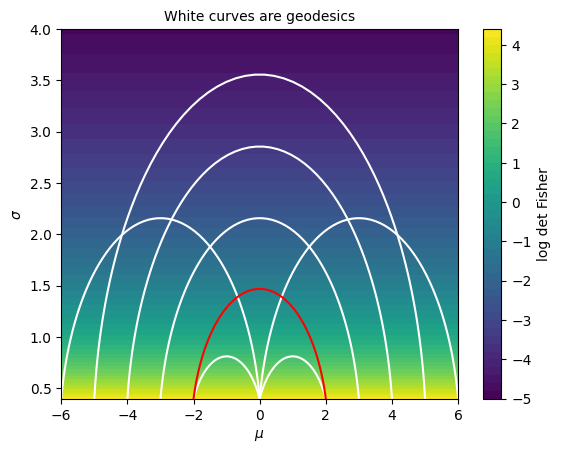

In [6]:
grid = params_grid
vals = np.log(np.linalg.det(fisher))

fig, ax = plt.subplots()

c = ax.contourf(grid[..., 0], grid[..., 1], vals, levels=50)

for geod_ in geod[:-1]:
    ax.plot(geod_[:, 0], geod_[:, 1], color="white")

ax.plot(geod[-1, :, 0], geod[-1, :, 1], color="red")


ax.set_xlabel("$\mu$")
ax.set_ylabel("$\sigma$")

ax.set_title("White curves are geodesics", size=10)

cbar = fig.colorbar(c, ax=ax)
cbar.set_label("log det Fisher")

Text(0.5, 0, '$x$')

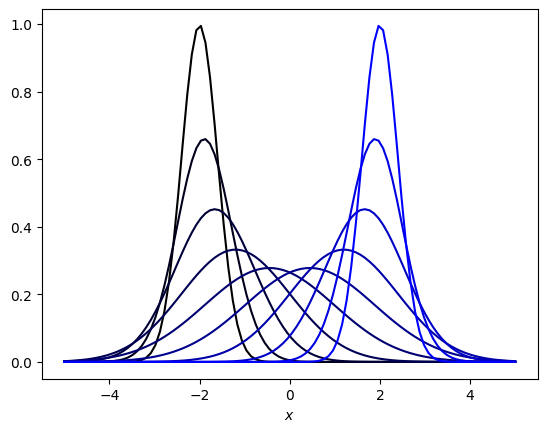

In [7]:
t = np.linspace(0, 1, 10)
last_geod = space.metric.geodesic(point_a[-1], point_b[-1])(t)

pdfs = space.point_to_pdf(last_geod)

x = gs.linspace(-5, 5, 100)

n_points = last_geod.shape[0]
cc = gs.zeros((n_points, 3))
cc[:, 2] = gs.linspace(0, 1, n_points)

fig, ax = plt.subplots()

for i in range(n_points):
    ax.plot(x, pdfs(x)[i, :], color=cc[i, :])

ax.set_xlabel("$x$")